In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv')


In [5]:
df

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,Achiuwa,56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,Adams,57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,Adebayo,78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,Agbaji,63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,Aldama,65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,Wilson,78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,Wright,39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,Yabusele,70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,Young,76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [7]:
df.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI', 'Starter'],
      dtype='object')

In [9]:
#checking the % of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Percentage of Missing Values per Column:\n")
print(missing_percent)


Percentage of Missing Values per Column:

Series([], dtype: float64)


No NaNs right now

In [12]:
non_numeric_cols = ['NAME', 'TM', 'POS', 'SCOPE', 'RS']  # Add any others that shouldn't be numeric
numeric_candidate_cols = df.columns.difference(non_numeric_cols)

# Step 2: Convert them to numeric, coercing non-numeric to NaN
for col in numeric_candidate_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

after checking, for other instances, where there are non numeric inputs such as --- in columns which are supposed to be numeric

In [15]:
# Total number of rows with at least one NaN
num_rows_with_nan = df.isna().any(axis=1).sum()

# Total number of rows in the DataFrame
total_rows = len(df)

# Percentage
percent_rows_with_nan = 100 * num_rows_with_nan / total_rows

print(f"Rows with at least one NaN: {num_rows_with_nan} out of {total_rows}")
print(f"Percentage: {percent_rows_with_nan:.2f}%")


Rows with at least one NaN: 0 out of 489
Percentage: 0.00%


dropping these rows with NaNs, as only 7% have them, and imputation doesn't make sense, as if we impute the numeric column with something like median, it wouldn't make sense as potentially with very little play time (less mins), might get extremely high 3pt % which logically doesnt make sense, also imputing based on the rows above or below doesnt make sense as data is arranged alphabetically by last name.


In [18]:
df = df.dropna().reset_index(drop=True)


In [20]:
#this cleans the name column, I'm removing the team abbreviation that is in our Name column
df['NAME'] = df['NAME'].apply(lambda x: x.rsplit(',', 1)[0].strip())


In [22]:
df['SCOPE'].value_counts()

SCOPE
Total    489
Name: count, dtype: int64

In [24]:
df = df[df['SCOPE'].str.lower() != 'team']


we're only looking at the complete stats of a player, not considering traded players more than once (for every time they were traded)

In [27]:
df['RS'].value_counts()

RS
ACT    489
Name: count, dtype: int64

In [29]:
df = df[df['RS'].str.upper() != 'NWT']


In [31]:
df['RS'].value_counts()

RS
ACT    489
Name: count, dtype: int64

we're only looking at the active players currently in the NBA, and not players who were on the team, didnt get any game time.

In [34]:
df.to_csv("cleaned_nba_stats.csv", index=False)


**Working with cleaned data now**

In [37]:
df_cleaned = df.copy()

In [39]:
df_cleaned.shape

(489, 29)

In [41]:
df_cleaned=pd.read_csv('/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv')

In [43]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,Achiuwa,56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,Adams,57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,Adebayo,78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,Agbaji,63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,Aldama,65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,Wilson,78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,Wright,39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,Yabusele,70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,Young,76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [45]:
df_cleaned['Starter'] = (df_cleaned['GS'] / df_cleaned['G'] >= 0.5).astype(int)


In [47]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,Achiuwa,56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,Adams,57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,Adebayo,78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,Agbaji,63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,Aldama,65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,Wilson,78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,Wright,39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,Yabusele,70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,Young,76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [49]:
df_cleaned.to_csv("cleaned_nba_stats.csv", index=False)


In [51]:
df_cleaned.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI', 'Starter'],
      dtype='object')

In [53]:
for col in df_cleaned.columns:
    print(col)


SCOPE
TM
RS
NAME
G
GS
MIN
FG
FGA
FG_PCT
FG3
FG3A
FG3_PCT
FT
FTA
FT_PCT
OFF
DEF
TREB
AST
PF
DQ
STL
TO
BLK
PTS
PPG
HI
Starter


# **EDA**

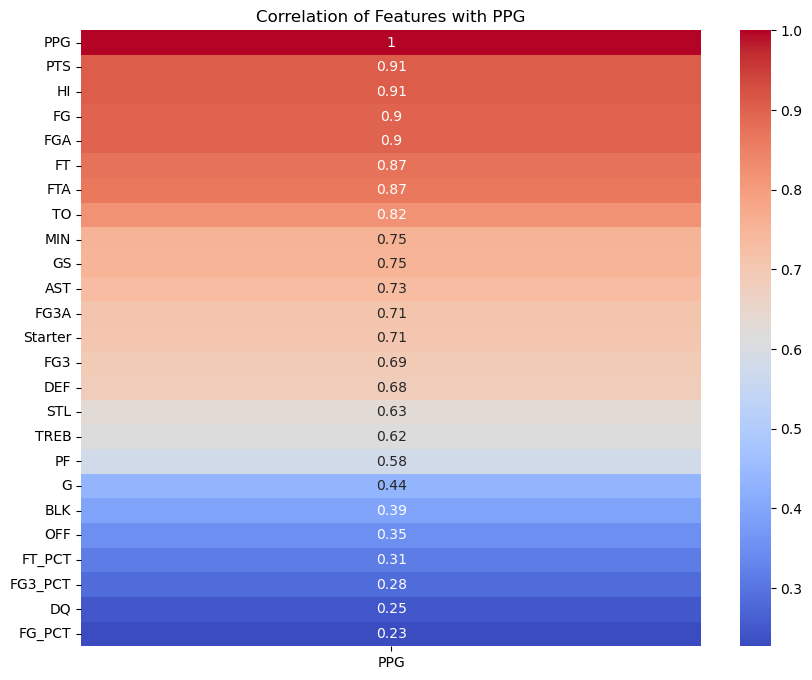

In [56]:

corr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['PPG']].sort_values(by='PPG', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with PPG')
plt.show()


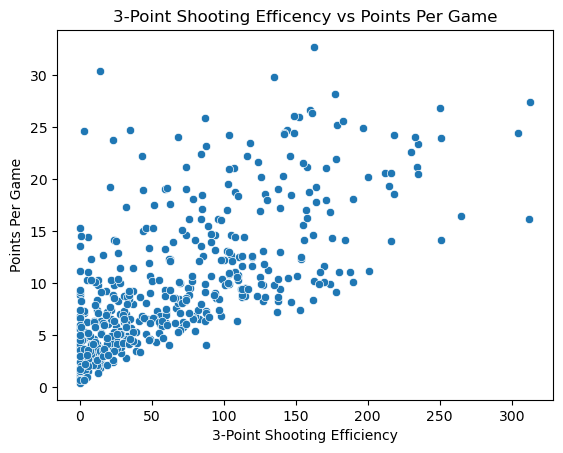

In [57]:
sns.scatterplot(data=df_cleaned, x='FG3', y='PPG')
plt.title('3-Point Shooting Efficency vs Points Per Game')
plt.xlabel('3-Point Shooting Efficiency')
plt.ylabel('Points Per Game')
plt.show()

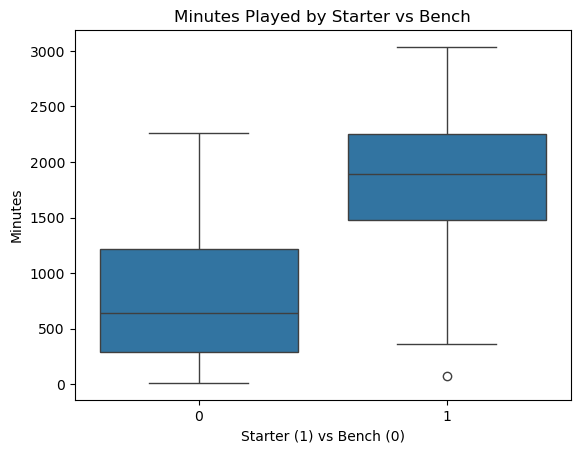

In [60]:
sns.boxplot(data=df_cleaned, x='Starter', y='MIN')
plt.title('Minutes Played by Starter vs Bench')
plt.xlabel('Starter (1) vs Bench (0)')
plt.ylabel('Minutes')
plt.show()


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

!pip install lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance

In [65]:
X = df_cleaned[['FG_PCT', 'MIN', 'FT_PCT', 'FG3_PCT']]  # Adjust column names if needed
y_clean_string = df_cleaned['PPG']

# Check that it worked
print(X.head())



   FG_PCT   MIN  FT_PCT  FG3_PCT
0   0.505  1137   0.600    0.278
1   0.546   777   0.462    0.000
2   0.485  2674   0.765    0.357
3   0.501  1701   0.708    0.404
4   0.483  1660   0.691    0.368


In [69]:
# Write a function to take in the feature variable (X) and the target variable (y_clean_string). Create a train test split for the variables. 
# Predict using Random Forest Classifier 
# Call your function and describe your baseline results 


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def train_evaluate_models(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the Random Forest Regressor
    random_forest = RandomForestRegressor(random_state=42)
    
    # Train the Random Forest
    random_forest.fit(X_train, y_train)
    
    # Predict using the Random Forest
    rf_predictions = random_forest.predict(X_test)
    
    # Calculate and print regression metrics
    print("\nRandom Forest Regression Metrics")
    print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions):.2f}")
    print(f"R² Score: {r2_score(y_test, rf_predictions):.2f}")

    

In [73]:
train_evaluate_models(X, y_clean_string)


Random Forest Regression Metrics
Mean Squared Error: 20.65
Mean Absolute Error: 3.14
R² Score: 0.51


The baseline RF Regressor model achieved a Mean Squared Error of 20.65 and a Mean Absolute Error of 3.14, indicating that predictions were typically off by about 3 points. The R² Score of 0.51 suggests that the model explains roughly half the variance in the players' points per game, which is a reasonable start but still highlights room for improvement through further hyperparameter tuning. 

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# -----------------------------
# Data Preprocessing
# -----------------------------

# Baseline data
X = df_cleaned[['FG_PCT', 'MIN', 'FT_PCT', 'FG3_PCT']]
y = df_cleaned['PPG']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_clean_string, test_size=0.3, random_state=42)

# -----------------------------
# Baseline Models
# -----------------------------

# 1. Train a vanilla (default) Random Forest Regressor
vanilla_rf = RandomForestRegressor(random_state=42)
vanilla_rf.fit(X_train, y_train)
vanilla_preds = vanilla_rf.predict(X_test)
vanilla_r2 = r2_score(y_test, vanilla_preds)

print(f"Baseline (Vanilla) R² Score: {vanilla_r2:.4f}")

# 2. Try 10+ different tuned models
tuned_r2_scores = []

# Optional: standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Try combinations of parameters
param_grid = [
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 200, 'max_depth': None},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 5},
    {'n_estimators': 300, 'max_depth': 20, 'min_samples_leaf': 2},
    {'n_estimators': 100, 'max_depth': 10, 'max_features': 'sqrt'},
    {'n_estimators': 200, 'max_depth': 5, 'bootstrap': False},
    {'n_estimators': 250, 'max_depth': 25, 'min_samples_split': 10},
    {'n_estimators': 120, 'max_depth': None, 'min_samples_leaf': 3},
    {'n_estimators': 180, 'max_depth': 12, 'max_features': 'log2'},
    {'n_estimators': 160, 'max_depth': 8, 'min_samples_split': 4},
    {'n_estimators': 300, 'max_depth': 20, 'max_features': 2}
]

for params in param_grid:
    rf = RandomForestRegressor(random_state=42, **params)
    rf.fit(X_train_scaled, y_train)
    preds = rf.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)
    tuned_r2_scores.append(r2)

# Print all results
for i, score in enumerate(tuned_r2_scores):
    print(f"Model {i+1} R² Score: {score:.4f}")

# Best result
best_r2 = max(tuned_r2_scores)
print(f"\n Best Tuned R² Score: {best_r2:.4f}")

Baseline (Vanilla) R² Score: 0.5149
Model 1 R² Score: 0.5126
Model 2 R² Score: 0.5218
Model 3 R² Score: 0.5145
Model 4 R² Score: 0.5264
Model 5 R² Score: 0.5126
Model 6 R² Score: 0.4330
Model 7 R² Score: 0.5103
Model 8 R² Score: 0.5386
Model 9 R² Score: 0.5229
Model 10 R² Score: 0.5189
Model 11 R² Score: 0.5228

 Best Tuned R² Score: 0.5386


## Using GridSearch for hyperparameter tuning to see if I can get the R^2 score up

In [85]:
$


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best R² Score: 0.5830357545508239
Fold R² scores: [0.51374841 0.57942201 0.54269712 0.57479958 0.5686192 ]
Cross-validation performance (mean R²): 0.5558572650536092


/var/folders/jb/m58d6yh92bz39swtqwkmllzw0000gn/T/ipykernel_37196/4262007576.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


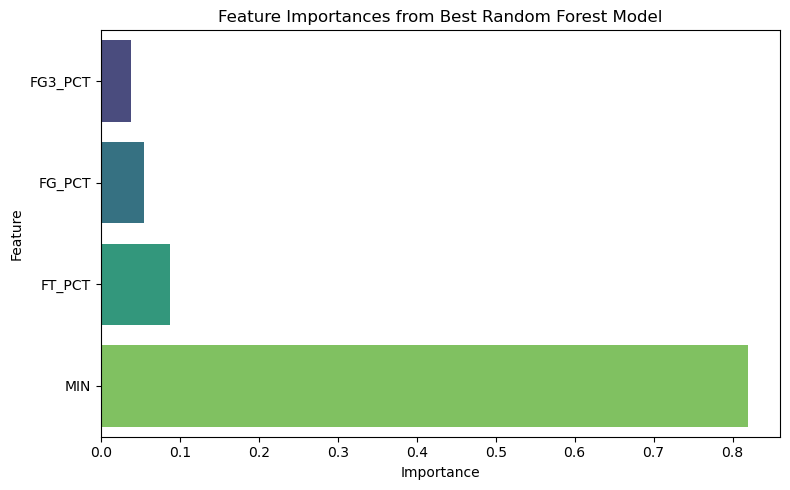

In [87]:
## 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get best model
rf_best = grid_search.best_estimator_

# Get importances and feature names
importances = rf_best.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The tuning improved model performance by about 2.7 percentage points in explained variance.
The model is also consistently performing well across folds, indicating low variance and decent generalization.

## Create a plot that summarizes the results of your experiments and how they conpare to the results of your baseline Random Forest Model

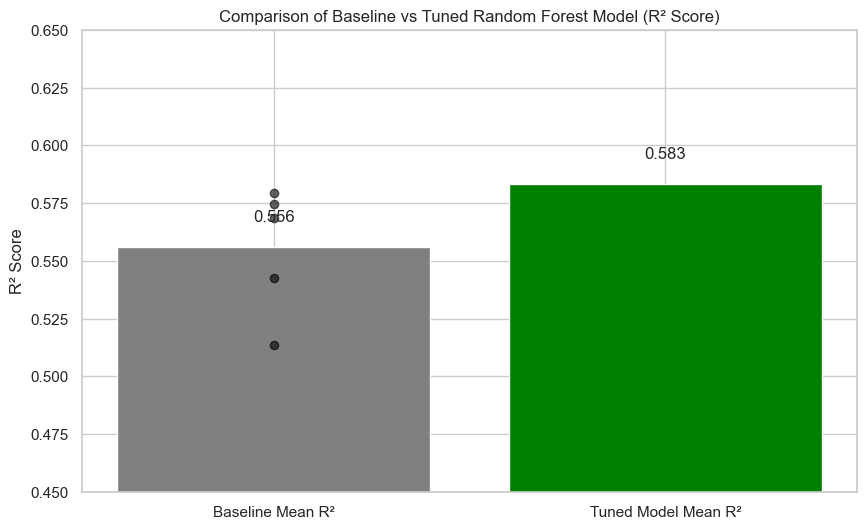

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
baseline_r2 = scores.mean()  # From cross_val_score (default model)
best_r2 = grid_search.best_score_  # From GridSearchCV

# Fold scores from baseline (optional to include)
fold_r2_scores = scores

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Bar plot
bars = plt.bar(
    ['Baseline Mean R²', 'Tuned Model Mean R²'],
    [baseline_r2, best_r2],
    color=['gray', 'green']
)

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Plot individual fold scores for the baseline (optional detail)
for i, score in enumerate(fold_r2_scores):
    plt.scatter('Baseline Mean R²', score, color='black', alpha=0.6)

# Labels
plt.title('Comparison of Baseline vs Tuned Random Forest Model (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0.45, 0.65)
plt.show()


The gray bar represents the baseline model, with a meanR^2 score of about 0.556. The black dots above the bar represent the individual R^2 scores from the 5-fold cross validation. These dots show some variability in model performance depending on the data split, which is expected in cross-validation. The Tuned Model is represented by the Green Bar with a Mean R^2 score of 0.584. This value was obtained through GridSearchCV using cross-validation and hyperparameter tuning. It is noticeably higher than the baseline-- an improving of 2.7 percentage points, which indicates that tuning the hyperparameters of n_estimators, max_depth, and min_samples_split successfully improved model performance. 

/var/folders/jb/m58d6yh92bz39swtqwkmllzw0000gn/T/ipykernel_37196/3876889464.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='R² Score', data=df_cv, palette='Set2')


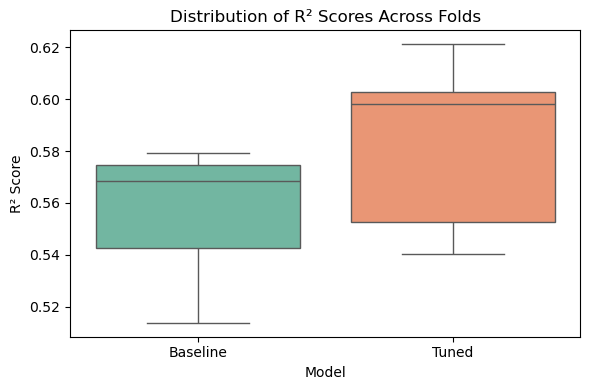

In [89]:
# Store tuned fold scores using best params from GridSearchCV
from sklearn.model_selection import cross_val_score

best_rf = grid_search.best_estimator_
tuned_fold_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

# Combine into a DataFrame
import pandas as pd

df_cv = pd.DataFrame({
    'R² Score': list(scores) + list(tuned_fold_scores),
    'Model': ['Baseline'] * 5 + ['Tuned'] * 5
})

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Model', y='R² Score', data=df_cv, palette='Set2')
plt.title("Distribution of R² Scores Across Folds")
plt.tight_layout()
plt.show()


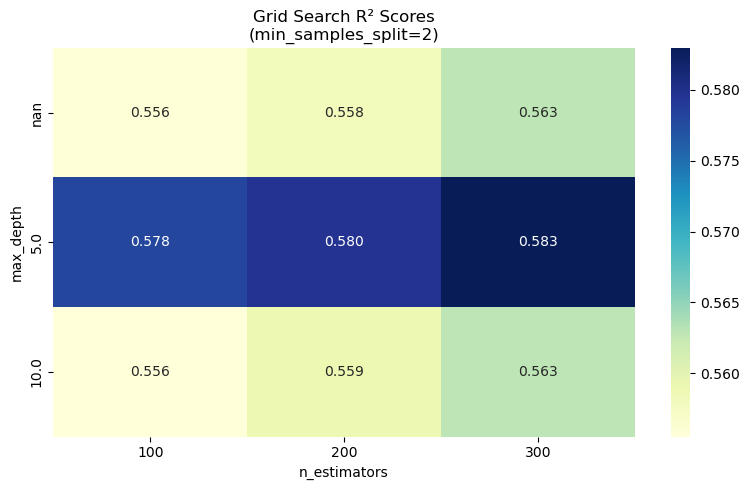

In [91]:
# Extract GridSearchCV results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# filter to one min_samples_split value to simplify heatmap
filtered = results_df[results_df['param_min_samples_split'] == 2]

# Pivot table
pivot = filtered.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Grid Search R² Scores\n(min_samples_split=2)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()
